In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import seaborn as sns
from scipy.stats import linregress

import PythonGraphMod

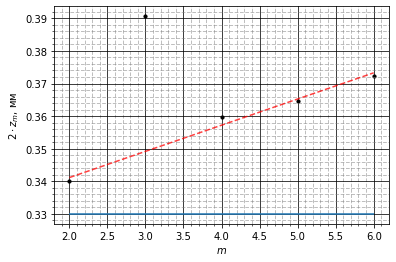

In [14]:
# открваем файлы с данными, получаем файловые дескрипторы
fd = pd.read_excel("../data/Frinel.ods")

# импортируем данные
m = np.array(fd['m'])
Z = np.array(fd['2zm'])

fig1, ax1 = PythonGraphMod.CreateSimpleGraph()

ax1.scatter(m, Z, color='black', marker='o', s=10, alpha=1)

# удалим выбивающееся значение
m = np.delete(m, 1)
Z = np.delete(Z, 1)

lin = linregress(m, Z)
ax1.plot(m, lin.intercept + lin.slope * m, color='red', alpha=0.75, lw=1.5, ls='--')

# параметры: координата по y, x_min, x_max
ax1.hlines(0.33, 2, 6, ls='-')

# сетка
ax1.minorticks_on()
ax1.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax1.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

# оформление
plt.ylabel(r'$2 \cdot z_m$, мм')
plt.xlabel(r'$m$')

fig1.savefig("../images/Frinel.pdf")

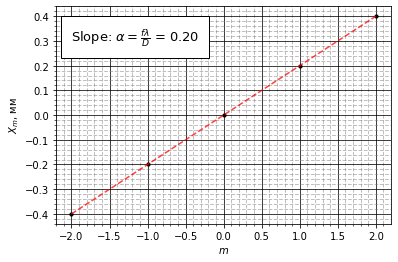

In [15]:
m = np.array([-2, -1, 0, 1, 2])
Xm = np.array([-20, -10, 0, 10, 20])
Xm = Xm * 0.02

fig2, ax2 = PythonGraphMod.CreateSimpleGraph()

ax2.scatter(m, Xm, color='black', marker='o', s=10, alpha=1)

lin = linregress(m, Xm)
ax2.plot(m, lin.intercept + lin.slope * m, color='red', alpha=0.75, lw=1.5, ls='--')

# сетка
ax2.minorticks_on()
ax2.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax2.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

# оформление
ax2.text(-2, 0.3, r'Slope: $\alpha = \frac{f \lambda}{D}$ = %0.2lf' %lin.slope, 
        size = 13,
        bbox=dict(facecolor='white', edgecolor='black', pad=10.0))
plt.ylabel(r'$X_m$, мм')
plt.xlabel(r'$m$')

fig2.savefig("../images/graph2.pdf")